# Task 2: Develop Time Series Forecasting Models
- Train and Forecast BND asset


**Model Selection**

Given the options of traditional statistical models (ARIMA, SARIMA) and a deep learning model (LSTM) for time series forecasting,

First, import required libraries and script modules

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor
from model_training import ModelTrainer
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

**Loading the Data**

In [4]:
# Initialize class instances
path = '../data/'
processor = DataPreprocessor(data_dir = path, logger=logger)

# Load the data
tsla_data = processor.load_data('BND')


**Prepare the data for Modeling**

In [5]:
# Create trainer instance of ModelTrainer
trainer = ModelTrainer(tsla_data, logger=logger)
# Prepare the data for modeling
trainer.prepare_data()


INFO:logger:Data was in descending order. It has been sorted in ascending order.
INFO:logger:Data split: 2877 train, 720 test


**Step 1: Train the ARIMA Model**

- optimize the parameters with auto_arima

In [6]:
trainer.train_arima()

INFO:logger:Training ARIMA model


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=28.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-15334.403, Time=0.68 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-16164.270, Time=0.55 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-17388.987, Time=5.45 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-15336.403, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.51 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-17222.260, Time=6.45 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.49 sec


INFO:logger:ARIMA model trained with parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (0, 2, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (0, 0, 0, 0), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}


 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.19 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 52.776 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2877
Model:               SARIMAX(0, 2, 1)   Log Likelihood                8697.494
Date:                Mon, 11 Nov 2024   AIC                         -17388.987
Time:                        10:19:16   BIC                         -17371.096
Sample:                    01-02-2015   HQIC                        -17382.538
                         - 11-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.488e-06   2.63e-06     -1.324      0.185   -8.65e-06    1

**Step 2: Train the SARIMA Model**

- optimize the parameters with auto_arima

In [7]:
trainer.train_sarima()

INFO:logger:Training SARIMA model


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=4.12 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-15344.709, Time=0.49 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-16311.959, Time=2.59 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=7.54 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-15342.908, Time=0.18 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-16582.774, Time=1.78 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=10.80 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=3.80 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-16584.533, Time=1.23 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=-16314.743, Time=0.74 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=14.34 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-16582.759, Time=1.64 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-16580.195, Time=2.70 sec


INFO:logger:SARIMA model trained with parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (0, 1, 0), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (2, 1, 0, 5), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': False}


 ARIMA(0,1,0)(2,1,0)[5] intercept   : AIC=-16582.537, Time=5.43 sec

Best model:  ARIMA(0,1,0)(2,1,0)[5]          
Total fit time: 57.404 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2877
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 5)   Log Likelihood                8295.267
Date:                           Mon, 11 Nov 2024   AIC                         -16584.533
Time:                                   10:20:14   BIC                         -16566.646
Sample:                               01-02-2015   HQIC                        -16578.085
                                    - 11-17-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

**Step 3: Train LSTM model**

INFO:logger:Training LSTM model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0873 - val_loss: 0.0020
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0068 - val_loss: 0.0026
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0053 - val_loss: 0.0032
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0043 - val_loss: 0.0018
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0

INFO:logger:LSTM model training completed


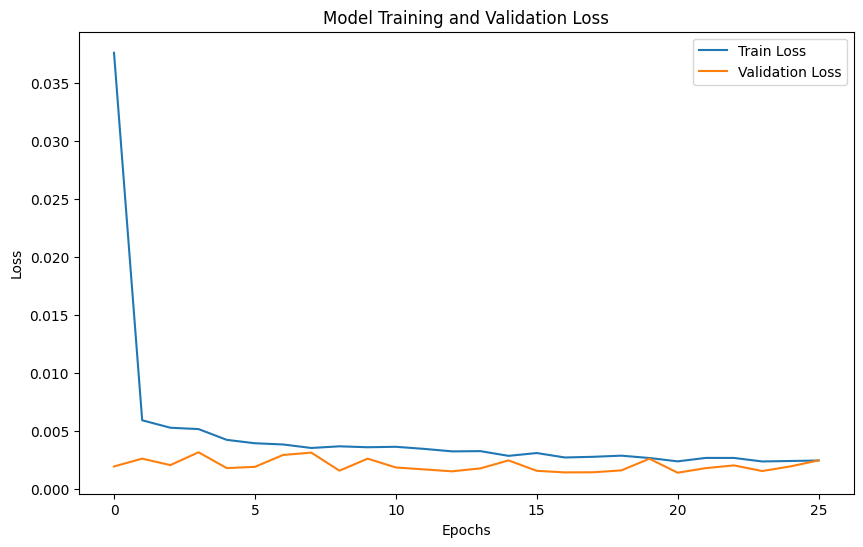

INFO:logger:Training history plotted successfully


In [8]:
trainer.train_lstm()

**Step 4: Make Predictions**

In [9]:
trainer.make_prediction()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

INFO:logger:Predictions generated for all models


**Step 5: Evaluate the models**

The models are evaluating using
- MAE, RSME, MAPE

In [10]:
trainer.evaluate_model()

INFO:logger:ARIMA - MAE: 0.81, RMSE: 0.98, MAPE: 598.17%
INFO:logger:SARIMA - MAE: 3.05, RMSE: 3.53, MAPE: 2968.08%
INFO:logger:LSTM - MAE: 0.14, RMSE: 0.15, MAPE: 94.24%



Model Evaluation Metrics:
     Model       MAE      RMSE         MAPE
0   ARIMA  0.810087  0.980254   598.172780
1  SARIMA  3.049509  3.529065  2968.075634
2    LSTM  0.136026  0.151659    94.244909


**Step 6: Compare the models**

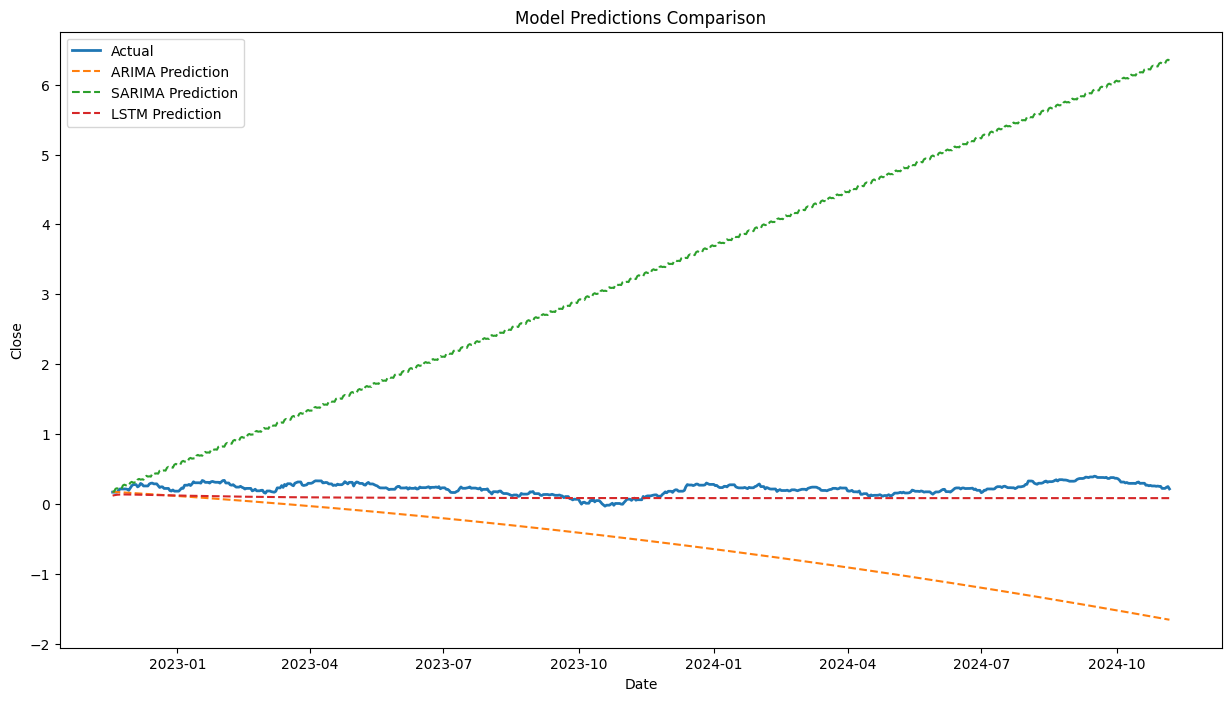

In [11]:
trainer.plot_result()

**Step 7: Forecast the next 6-12 months and save the forecast to csv with confidence interval**

In [12]:
# model_trainer.forecast(months=6, output_file='forecast_6_months.csv')
trainer.forecast(months=12, output_file='../data/bnd_forecast_12_months.csv', best_model='LSTM')

INFO:logger:Results plotted successfully


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

INFO:logger:Forecast results saved to data/bnd_forecast_12_months.csv
